In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

from nfl_game import Game

In [2]:
# https://www.kaggle.com/code/huntingdata11/animated-and-interactive-nfl-plays-in-plotly

colors = {
    'ARI':"#97233F", 
    'ATL':"#A71930", 
    'BAL':'#241773', 
    'BUF':"#00338D", 
    'CAR':"#0085CA", 
    'CHI':"#C83803", 
    'CIN':"#FB4F14", 
    'CLE':"#311D00", 
    'DAL':'#003594',
    'DEN':"#FB4F14", 
    'DET':"#0076B6", 
    'GB':"#203731", 
    'HOU':"#03202F", 
    'IND':"#002C5F", 
    'JAX':"#9F792C", 
    'KC':"#E31837", 
    'LA':"#003594", 
    'LAC':"#0080C6", 
    'LV':"#000000",
    'MIA':"#008E97", 
    'MIN':"#4F2683", 
    'NE':"#002244", 
    'NO':"#D3BC8D", 
    'NYG':"#0B2265", 
    'NYJ':"#125740", 
    'PHI':"#004C54", 
    'PIT':"#FFB612", 
    'SEA':"#69BE28", 
    'SF':"#AA0000",
    'TB':'#D50A0A', 
    'TEN':"#4B92DB", 
    'WAS':"#5A1414", 
    'football':'#CBB67C'
}

In [21]:
game = Game(gameId=2021090900)

In [22]:
play = game.get_play(97)
frame = play.get_frame(1)

In [23]:
def get_blank_field():
    yardlines = np.arange(100, 1100+1, 100)
    yardline_width = 4
    
    yard_mark = list(np.arange(0, 50, 10)) + [50] + list(reversed(list(np.arange(0, 50, 10))))
    font_size=40

    image = Image.new("RGB", (1200, 533), "green")
    draw = ImageDraw.Draw(image)
    assert yardline_width % 2 == 0
    for yl, ym in zip(yardlines, yard_mark):
        yl_x = (yl - (yardline_width / 2))
        draw.line([(yl_x, 0), (yl_x, 533)], width = yardline_width, fill="white")
        
        font = ImageFont.truetype("football_font.ttf", size=font_size)
        draw.text((yl-(font_size/2), 533-(font_size+5)), str(ym), font=font, fill = "black")
        
    image = image.transpose(1)

    return image

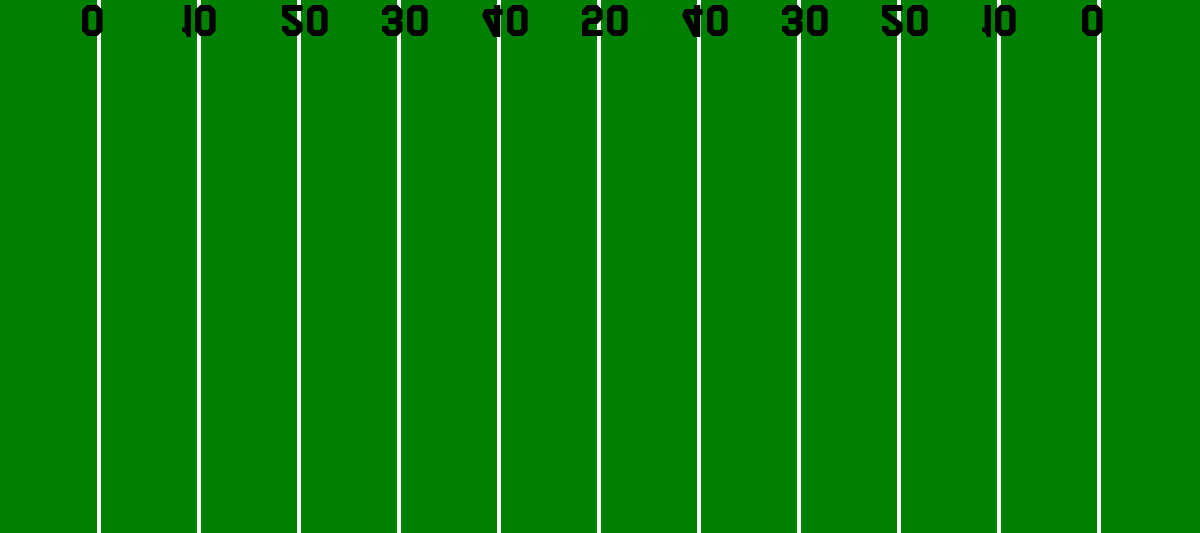

In [24]:
get_blank_field()

In [31]:
def draw_players(frame):
    field = get_blank_field()
    draw = ImageDraw.Draw(field)

    p_rad = 6
    fb_w=8
    fb_h=5
    
    plot_x = frame["x"].apply(lambda x: round(x, 1) * 10)
    frame.loc[:, "plot_x"] = plot_x
    plot_y = frame["y"].apply(lambda x: round(x, 1) * 10)
    frame.loc[:, "plot_y"] = plot_y

    for row in frame.iterrows():
        x = row[1]["plot_x"]
        y = row[1]["plot_y"]

        if row[1]["team"] == "football":
            draw.ellipse((x-fb_w, y-fb_h, x+fb_w, y+fb_h), fill=colors[row[1]["team"]])
        else:
            draw.ellipse((x-p_rad, y-p_rad, x+p_rad, y+p_rad), fill=colors[row[1]["team"]])
        
    return field

In [32]:
field = draw_players(frame)

In [33]:
def finalize(field):
    """Flips the image and adds field markings"""
    field = field.transpose(1)

    return field

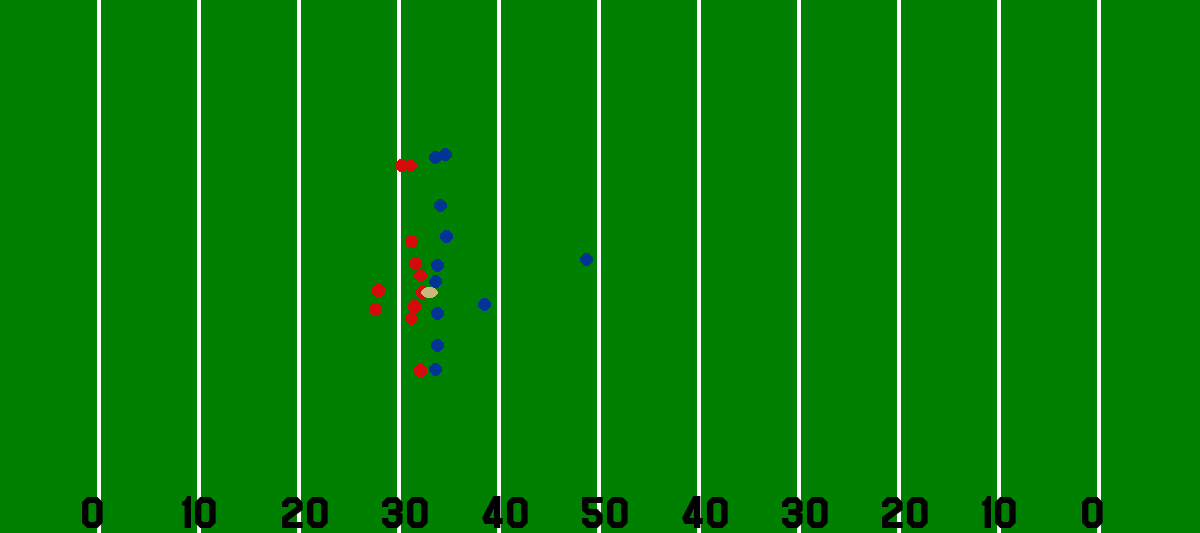

In [34]:
finalize(field)